In [ ]:
! pip install pandas tqdm nltk matplotlib

In [49]:
import pandas as pd
import nltk
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from tqdm import tqdm

nltk.download('punkt')
tqdm.pandas()

train_stances = pd.read_csv('train_stances.csv', index_col="Body ID")
train_bodies = pd.read_csv('train_bodies.csv', index_col="Body ID")

test_stances = pd.read_csv('competition_test_stances.csv', index_col="Body ID")
test_bodies = pd.read_csv('competition_test_bodies.csv', index_col="Body ID")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/thomasvant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [50]:
# XSum
train_bodies_xsum = pd.read_csv(f'train_bodies_google_pegasus-xsum.csv', index_col="Body ID")
test_bodies_xsum = pd.read_csv(f'test_bodies_google_pegasus-xsum.csv', index_col="Body ID")

# CNN/DailyNews
train_bodies_cnn_dailymail = pd.read_csv(f'train_bodies_google_pegasus-cnn_dailymail.csv', index_col="Body ID")
test_bodies_cnn_dailymail = pd.read_csv(f'test_bodies_google_pegasus-cnn_dailymail.csv', index_col="Body ID")

# Newsroom
train_bodies_newsroom = pd.read_csv(f'train_bodies_google_pegasus-newsroom.csv', index_col="Body ID")
test_bodies_newsroom = pd.read_csv(f'test_bodies_google_pegasus-newsroom.csv', index_col="Body ID")

# Multi-News
train_bodies_multi_news = pd.read_csv(f'train_bodies_google_pegasus-multi_news.csv', index_col="Body ID")
test_bodies_multi_news = pd.read_csv(f'test_bodies_google_pegasus-multi_news.csv', index_col="Body ID")

# Reduction calculation

In [51]:
def count(df):
    return df["articleBody"].progress_apply(count_singular)

def count_singular(string):
    try:
        return len(nltk.word_tokenize(string))
    except TypeError:
        print(string)
        return 0

## Train data

In [52]:
count_df_train = count(train_bodies)
count_df_train_xsum = count(train_bodies_xsum)
count_df_train_cnn_dailymail = count(train_bodies_cnn_dailymail)
count_df_train_newsroom = count(train_bodies_newsroom)
count_df_train_multi_news = count(train_bodies_multi_news)

 50%|██████████████████▉                   | 839/1683 [00:00<00:00, 4080.65it/s]

nan


100%|█████████████████████████████████████| 1683/1683 [00:00<00:00, 3172.62it/s]


In [25]:
reduction_df_train_xsum = count_df_train_xsum / count_df_train
reduction_df_train_cnn_dailymail = count_df_train_cnn_dailymail / count_df_train
reduction_df_train_newsroom = count_df_train_newsroom / count_df_train
reduction_df_train_multi_news = count_df_train_multi_news / count_df_train

In [26]:
(reduction_df_train_xsum > 1.0).value_counts()

False    1649
True       34
Name: articleBody, dtype: int64

In [27]:
(reduction_df_train_cnn_dailymail > 1.0).value_counts()

False    1622
True       61
Name: articleBody, dtype: int64

In [28]:
(reduction_df_train_newsroom > 1.0).value_counts()

False    1622
True       61
Name: articleBody, dtype: int64

In [29]:
(reduction_df_train_multi_news > 1.0).value_counts()

False    1568
True      115
Name: articleBody, dtype: int64

In [30]:
train_bodies_xsum[reduction_df_train_xsum > 1.0] = train_bodies[reduction_df_train_xsum > 1.0]
train_bodies_cnn_dailymail[reduction_df_train_cnn_dailymail > 1.0] = train_bodies[reduction_df_train_cnn_dailymail > 1.0]
train_bodies_newsroom[reduction_df_train_newsroom > 1.0] = train_bodies[reduction_df_train_newsroom > 1.0]
train_bodies_multi_news[reduction_df_train_multi_news > 1.0] = train_bodies[reduction_df_train_multi_news > 1.0]

In [31]:
train_bodies_xsum.to_csv("train_bodies_xsum_cleaned")
train_bodies_cnn_dailymail.to_csv("train_bodies_cnn_dailymail_cleaned")
train_bodies_newsroom.to_csv("train_bodies_newsroom_cleaned")
train_bodies_multi_news.to_csv("train_bodies_multi_news_cleaned")

## Test data

In [32]:
count_df_test = count(test_bodies)
count_df_test_xsum = count(test_bodies_xsum)
count_df_test_cnn_dailymail = count(test_bodies_cnn_dailymail)
count_df_test_newsroom = count(test_bodies_newsroom)
count_df_test_multi_news = count(test_bodies_multi_news)

100%|███████████████████████████████████████| 904/904 [00:00<00:00, 3083.97it/s]


In [33]:
reduction_df_test_xsum = count_df_test_xsum / count_df_test
reduction_df_test_cnn_dailymail = count_df_test_cnn_dailymail / count_df_test
reduction_df_test_newsroom = count_df_test_newsroom / count_df_test
reduction_df_test_multi_news = count_df_test_multi_news / count_df_test

In [34]:
(reduction_df_test_xsum > 1.0).value_counts()

False    871
True      33
Name: articleBody, dtype: int64

In [35]:
(reduction_df_test_cnn_dailymail > 1.0).value_counts()

False    841
True      63
Name: articleBody, dtype: int64

In [36]:
(reduction_df_test_newsroom > 1.0).value_counts()

False    848
True      56
Name: articleBody, dtype: int64

In [37]:
(reduction_df_test_multi_news > 1.0).value_counts()

False    813
True      91
Name: articleBody, dtype: int64

In [39]:
test_bodies_xsum[reduction_df_test_xsum > 1.0] = test_bodies[reduction_df_test_xsum > 1.0]
test_bodies_cnn_dailymail[reduction_df_test_cnn_dailymail > 1.0] = test_bodies[reduction_df_test_cnn_dailymail > 1.0]
test_bodies_newsroom[reduction_df_test_newsroom > 1.0] = test_bodies[reduction_df_test_newsroom > 1.0]
test_bodies_multi_news[reduction_df_test_multi_news > 1.0] = test_bodies[reduction_df_test_multi_news > 1.0]

In [40]:
test_bodies_xsum.to_csv("test_bodies_xsum_cleaned")
test_bodies_cnn_dailymail.to_csv("test_bodies_cnn_dailymail_cleaned")
test_bodies_newsroom.to_csv("test_bodies_newsroom_cleaned")
test_bodies_multi_news.to_csv("test_bodies_multi_news_cleaned")

# Boxplot

In [41]:
count_df_test = count(test_bodies)
count_df_test_xsum = count(test_bodies_xsum)
count_df_test_cnn_dailymail = count(test_bodies_cnn_dailymail)
count_df_test_newsroom = count(test_bodies_newsroom)
count_df_test_multi_news = count(test_bodies_multi_news)

100%|███████████████████████████████████████| 904/904 [00:00<00:00, 3340.40it/s]


In [42]:
reduction_df_test_xsum = abs((count_df_test_xsum - count_df_test) / count_df_test)
reduction_df_test_cnn_dailymail = abs((count_df_test_cnn_dailymail - count_df_test) / count_df_test)
reduction_df_test_newsroom = abs((count_df_test_newsroom - count_df_test) / count_df_test)
reduction_df_test_multi_news = abs((count_df_test_multi_news - count_df_test) / count_df_test)

In [57]:
reduction_df = pd.DataFrame({"XSum": reduction_df_test_xsum, "CNN/DailyMail":reduction_df_test_cnn_dailymail, "NEWSROOM":reduction_df_test_newsroom,"Multi-News":reduction_df_test_multi_news})

<AxesSubplot:>

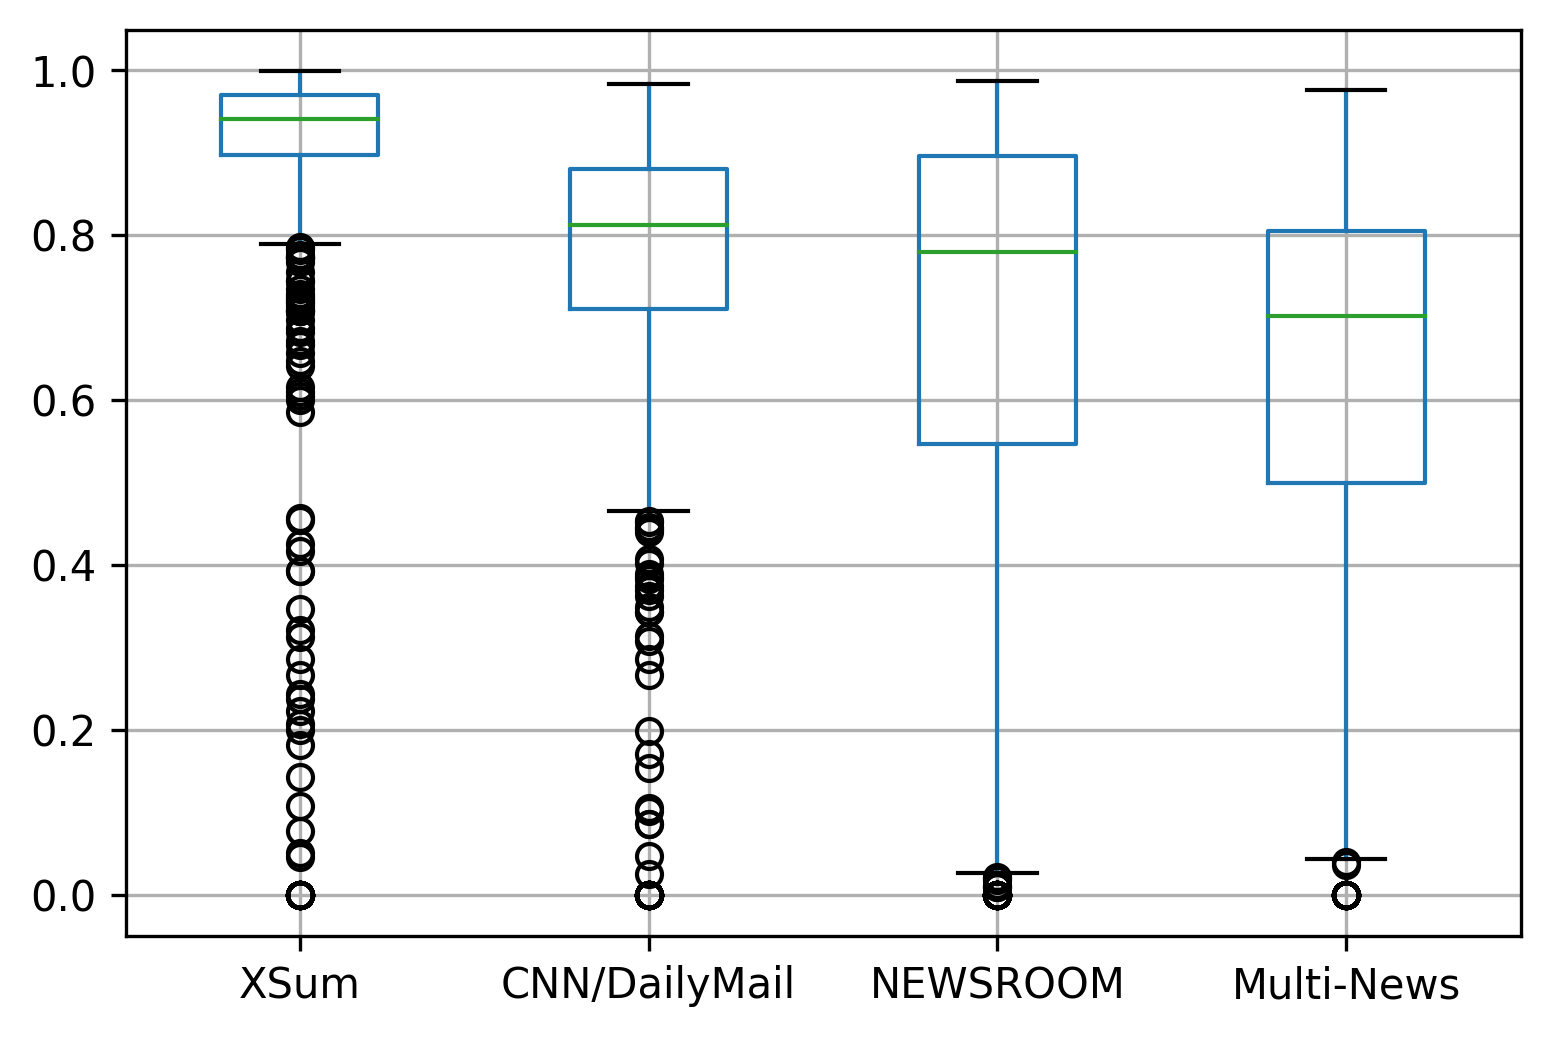

In [59]:
reduction_df.boxplot()

In [43]:
plt.rcParams["figure.dpi"] = 300

<AxesSubplot:>

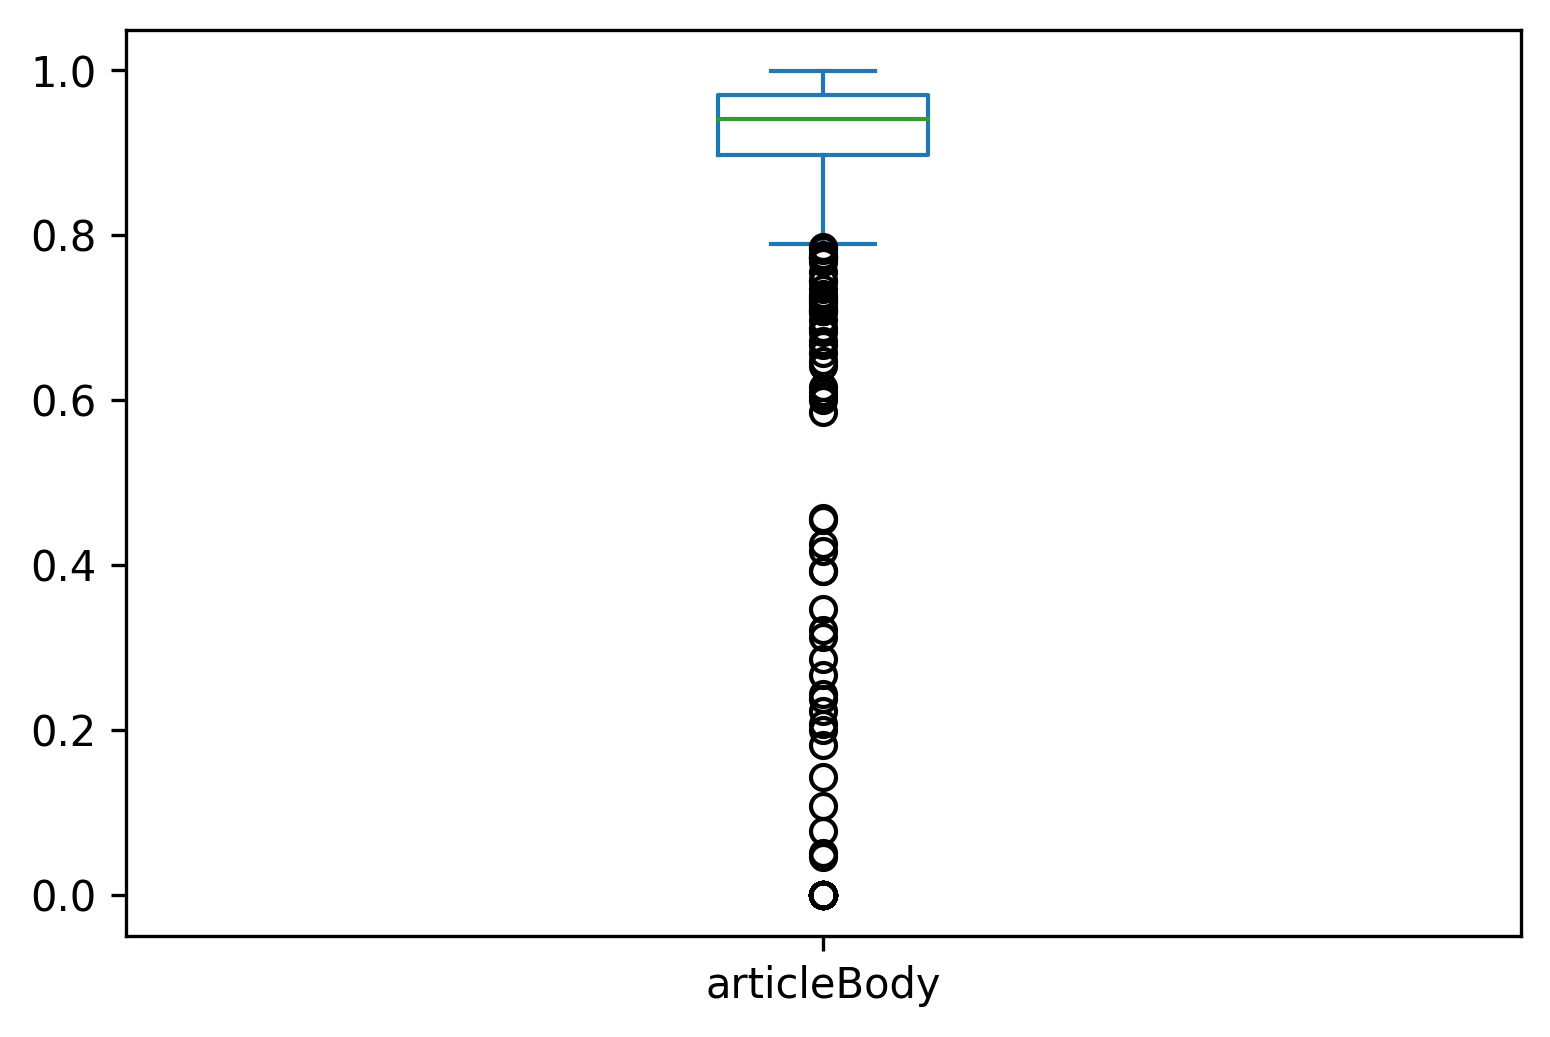

In [45]:
reduction_df_test_xsum.plot.box()

<AxesSubplot:>

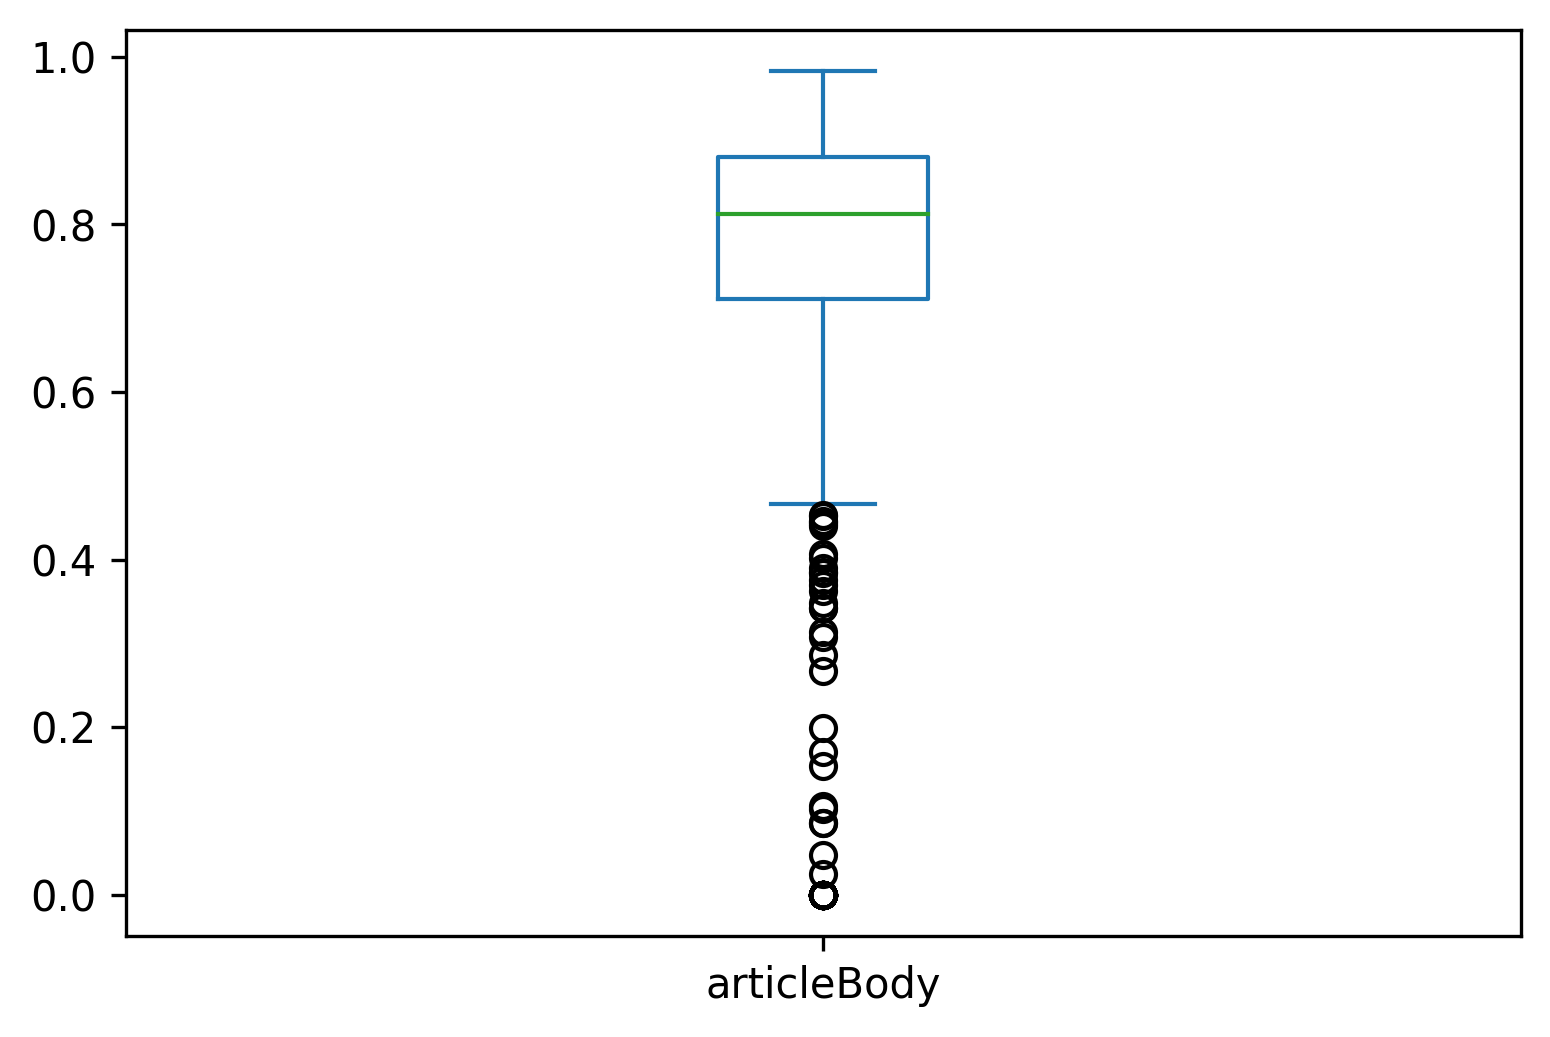

In [55]:
reduction_df_test_cnn_dailymail.plot.box()

<AxesSubplot:>

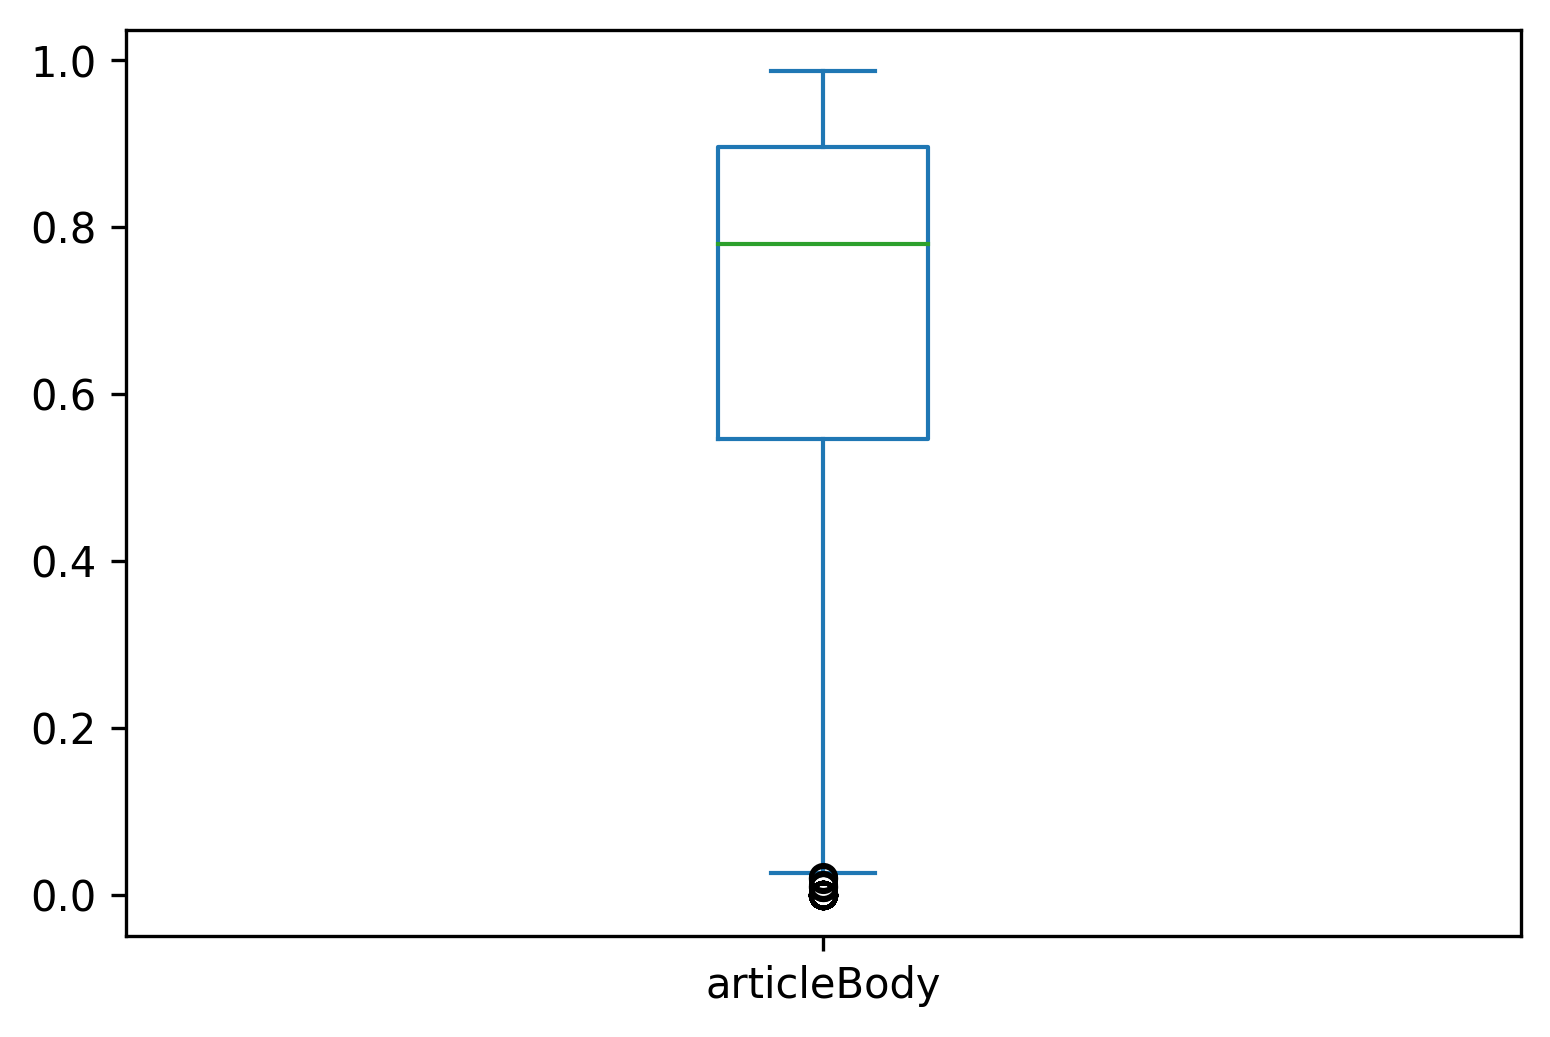

In [54]:
reduction_df_test_newsroom.plot.box()

<AxesSubplot:>

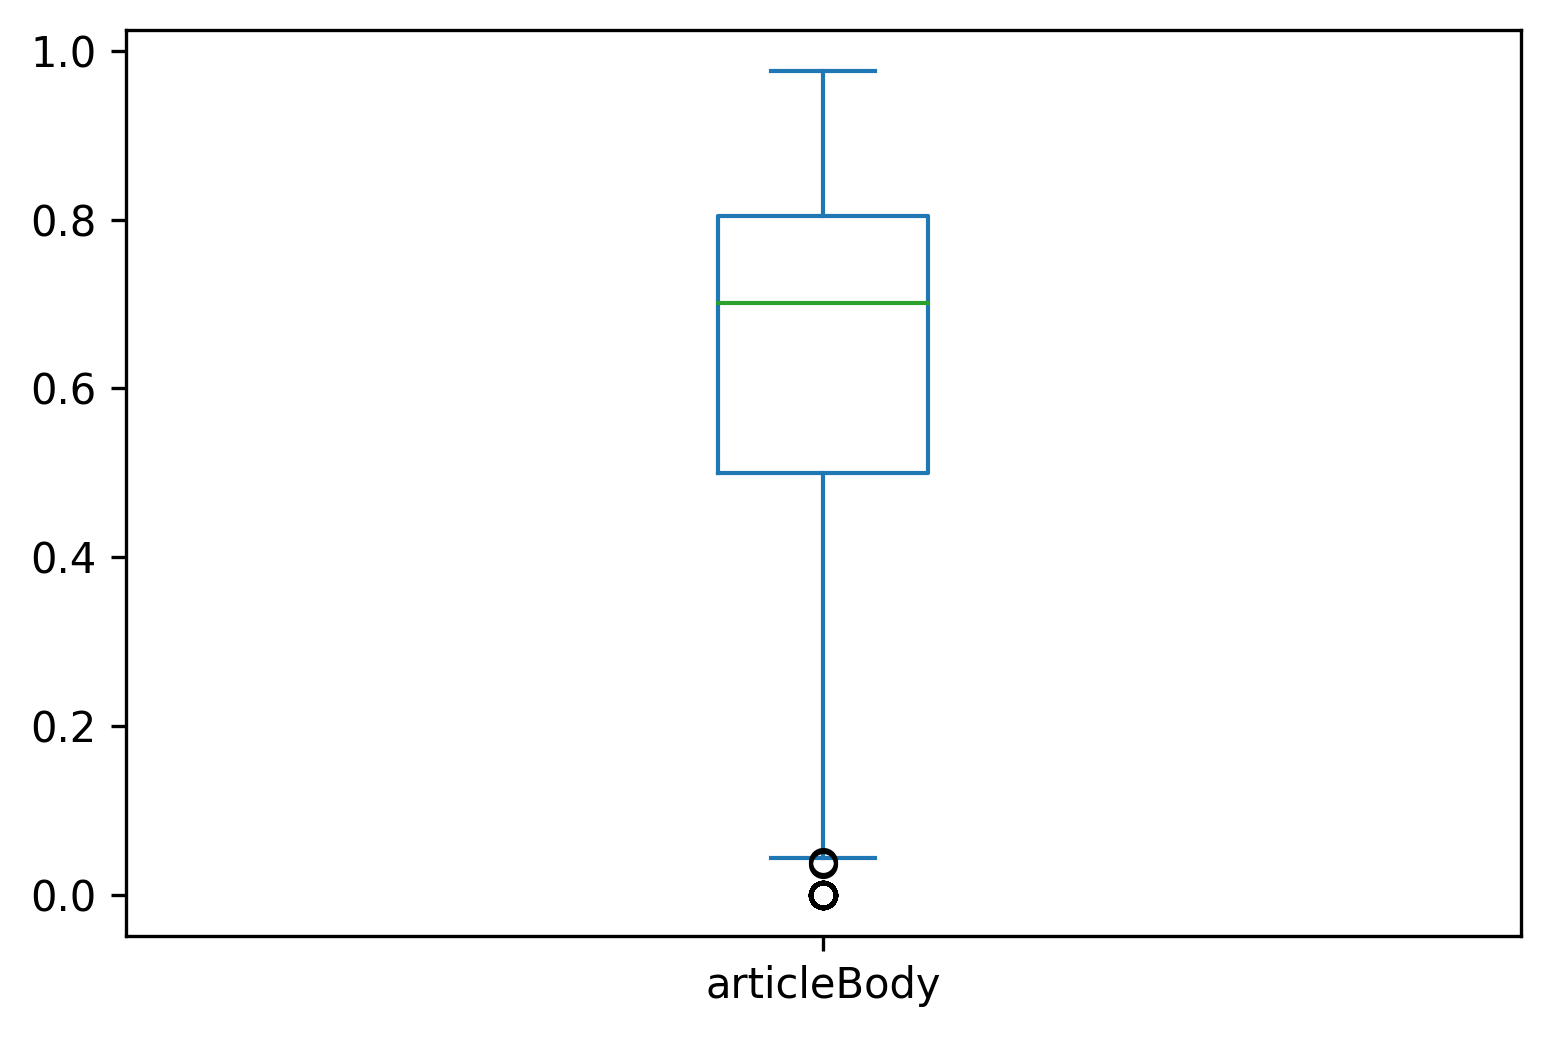

In [53]:
reduction_df_test_multi_news.plot.box()